In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast 
import numpy as np
from collections import Counter

In [3]:
df_job=pd.read_csv(r"C:\Users\sayur\OneDrive\Documentos\DataSets\ai_job_dataset\ai_job_dataset.csv")

Se verifican los tipos de datos de cada columna

In [4]:
df_job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [5]:
df_job.head(2)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc


Se eliminan los datos duplicados

In [6]:
df_job = df_job.drop_duplicates()

Se usa la funcion isnull para ver los valores nulos y la funcion sum para sumar los valores nulos por columna

In [7]:
print(df_job.isnull().sum())

job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


Como no hay valores nulos no se reemplazan

Se convierte todo a minusculas

In [8]:
# Aplicar minúsculas solo a columnas de texto (object)
df_job = df_job.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

df_job.head(2)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,ai00001,ai research scientist,90376,usd,se,ct,china,m,china,50,"tableau, pytorch, kubernetes, linux, nlp",bachelor,9,automotive,2024-10-18,2024-11-07,1076,5.9,smart analytics
1,ai00002,ai software engineer,61895,usd,en,ct,canada,m,ireland,100,"deep learning, aws, mathematics, python, docker",master,1,media,2024-11-20,2025-01-11,1268,5.2,techcorp inc


Se hace el conteo de cada trabajo

In [9]:
job_counts = df_job['job_title'].value_counts()

Se grafican el conteo

C:\Users\sayur\AppData\Local\Temp\ipykernel_15640\1730803116.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=job_counts.index,


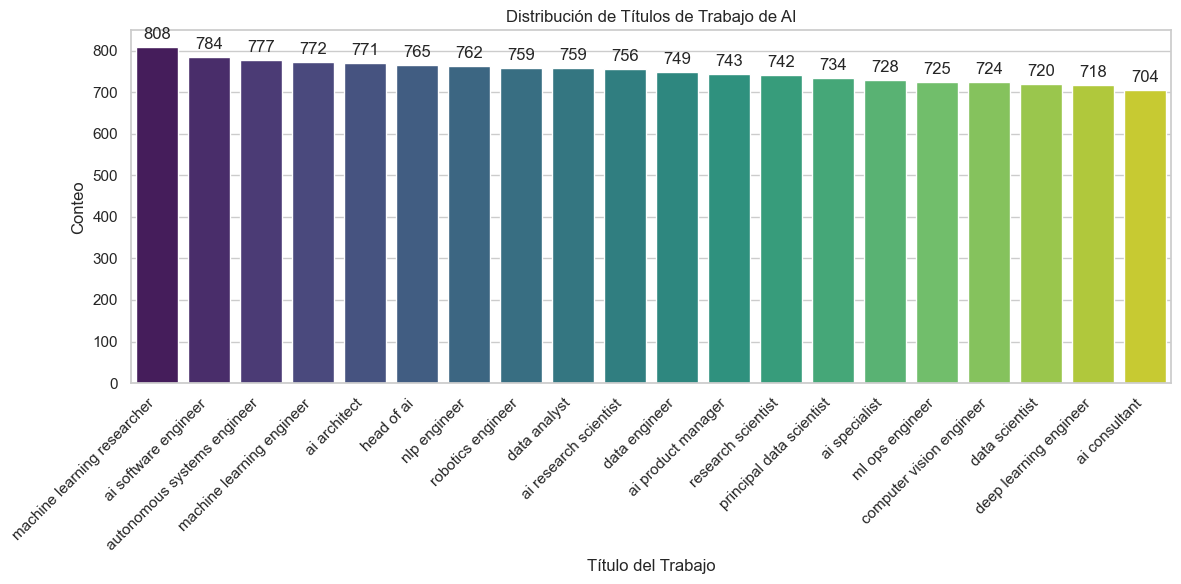

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=job_counts.index, 
            y=job_counts.values,
            palette="viridis")

plt.title('Distribución de Títulos de Trabajo de AI')
plt.xlabel('Título del Trabajo')
plt.ylabel('Conteo')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 9), 
               textcoords='offset points')

plt.tight_layout()
plt.show()

Se puede observar que el puesto con mas candiatos es "machine learning researcher", al contrario el menor es "ai consultant"

Se calcula el salario promedio por cada puesto de trabajo respecto al nivel de experiencia

In [11]:
experience_counts = df_job['experience_level'].value_counts()

C:\Users\sayur\AppData\Local\Temp\ipykernel_15640\963635128.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=experience_counts.index,


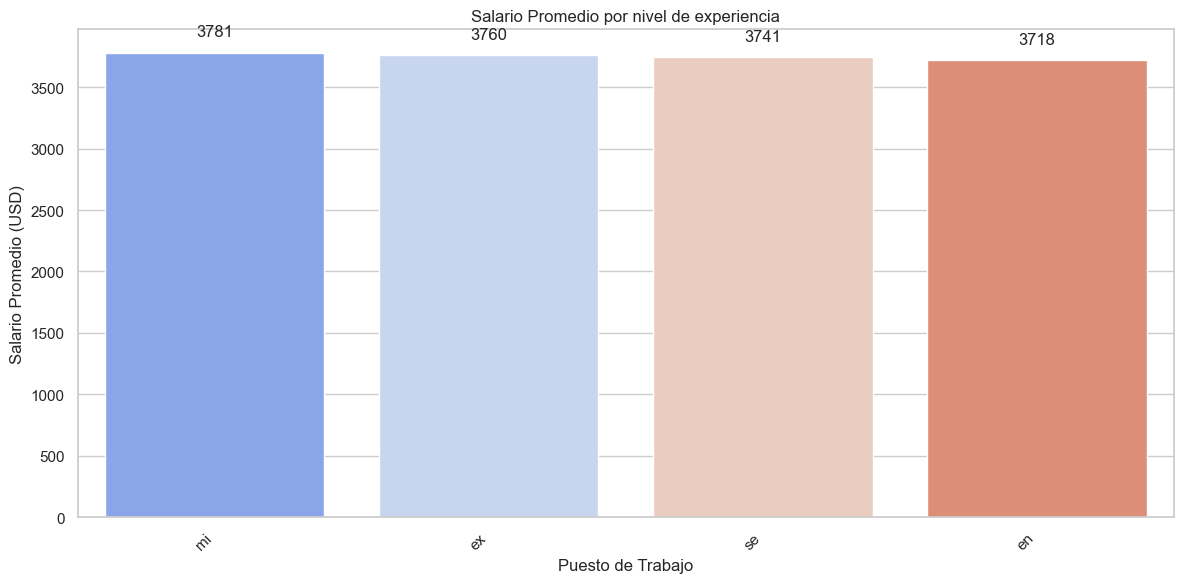

In [12]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=experience_counts.index, 
            y=experience_counts.values,
            palette="coolwarm")

plt.title('Salario Promedio por nivel de experiencia')
plt.xlabel('Puesto de Trabajo')
plt.ylabel('Salario Promedio (USD)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 15), 
               textcoords='offset points')

plt.tight_layout()
plt.show()

In [13]:
# Calcular el promedio de salario por puesto
avg_salary = df_job.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)

C:\Users\sayur\AppData\Local\Temp\ipykernel_15640\593118238.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=avg_salary.index,


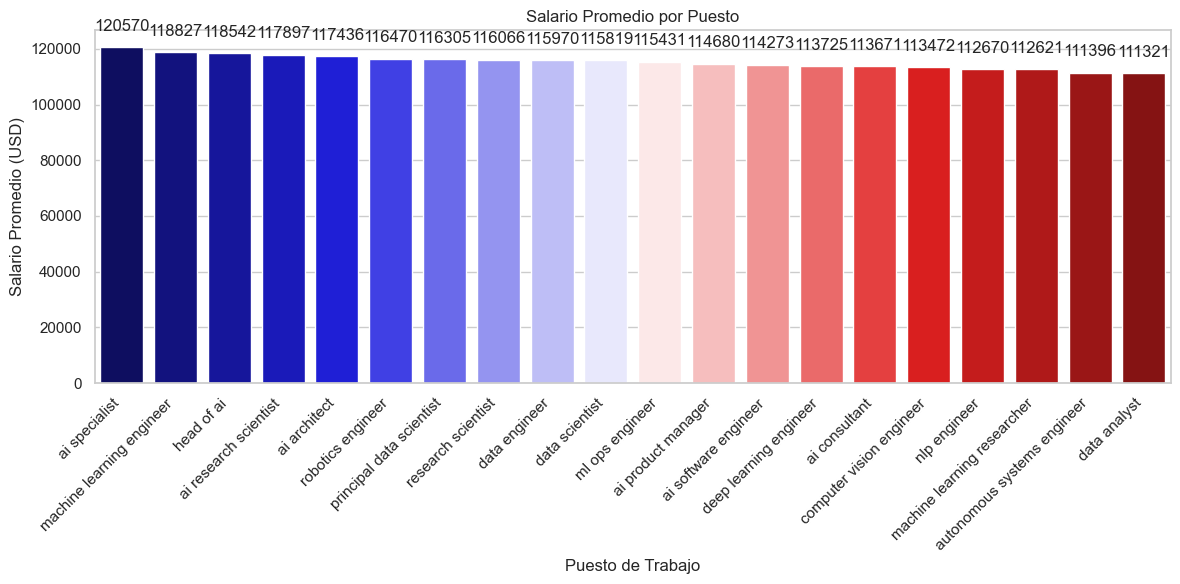

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=avg_salary.index, 
            y=avg_salary.values,
            palette="seismic")

plt.title('Salario Promedio por Puesto')
plt.xlabel('Puesto de Trabajo')
plt.ylabel('Salario Promedio (USD)')
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha='center', va='center', 
               xytext=(0, 15), 
               textcoords='offset points')

plt.tight_layout()
plt.show()

Se puede determinar que el puesto de ai con mejor sueldo promedio es "ai specialist" con $120,570 

In [18]:
#avg_salexp=avg_salary.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
avg_salexp = df_job.groupby('experience_level')['salary_usd'].mean().reset_index()

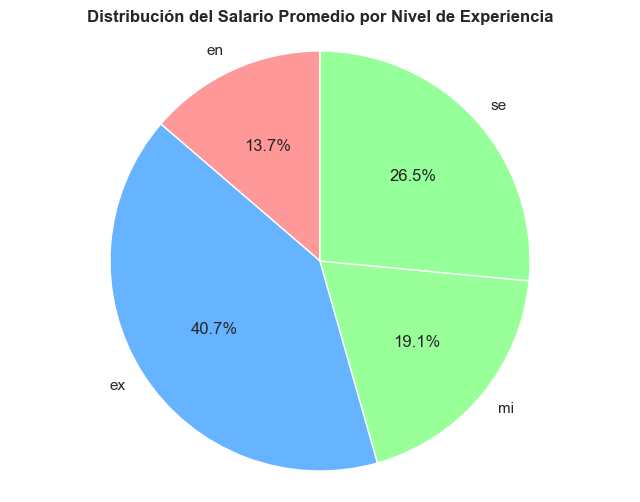

In [23]:
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.pie(
    x=avg_salexp['salary_usd'],  # Valores (promedios)
    labels=avg_salexp['experience_level'],  # Etiquetas (niveles)
    autopct='%1.1f%%',  # Porcentajes con 1 decimal
    startangle=90,  # Rotación inicial (opcional)
    colors=['#ff9999', '#66b3ff', '#99ff99', '#95ff99']  # Colores personalizados
)
plt.title('Distribución del Salario Promedio por Nivel de Experiencia', fontweight='bold')
plt.axis('equal')

    # 4. Mostrar el gráfico
plt.show()


Analizar el lugar de residencia de los aplicantes vs la ubicacion de la empresa-pendiente

In [36]:
avg_countrycomp = df_job['company_location'].value_counts()
avg_countrycomp

company_location
germany           814
denmark           778
canada            769
france            769
austria           765
singapore         764
china             763
india             754
sweden            752
israel            751
ireland           750
switzerland       746
japan             733
finland           733
australia         732
netherlands       731
united kingdom    729
united states     724
south korea       722
norway            721
Name: count, dtype: int64

In [37]:
avg_countryappl = df_job['employee_residence'].value_counts()
avg_countryappl

employee_residence
sweden            790
france            781
denmark           777
austria           776
india             772
germany           769
south korea       763
canada            762
china             761
netherlands       758
united kingdom    750
switzerland       748
ireland           740
singapore         740
israel            731
australia         730
norway            726
united states     716
finland           710
japan             700
Name: count, dtype: int64

In [39]:
df_job.head(1)

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,ai00001,ai research scientist,90376,usd,se,ct,china,m,china,50,"tableau, pytorch, kubernetes, linux, nlp",bachelor,9,automotive,2024-10-18,2024-11-07,1076,5.9,smart analytics


Conteo de Skills requeridas para aplicar a trabajos en AI.

In [51]:
all_skills = [skill.strip() for skills_list in df_job['required_skills'].dropna() for skill in skills_list.split(',')]
skills_count = Counter(all_skills)

df_skills = pd.DataFrame(skills_count.items(), columns=['Skill', 'Count']).sort_values('Count', ascending=False)

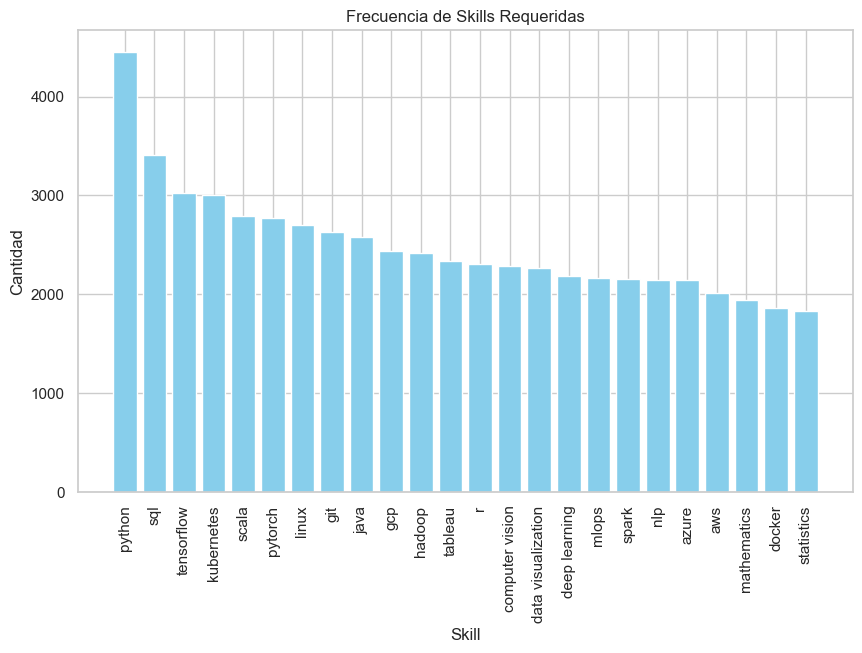

In [55]:
plt.figure(figsize=(10, 6))
plt.bar(df_skills['Skill'], df_skills['Count'], color='skyblue')
plt.title('Frecuencia de Skills Requeridas')
plt.xlabel('Skill')
plt.ylabel('Cantidad')
plt.xticks(rotation=90)
plt.show()

Se observa que python es el lenguaje que simpre se solicita en los trabajos de AI. Al contrario statistics no es tan requerido pero si es importante en casi la mitad de puestos.